In [1]:
#Upload csv excel file
import pandas as pd
data = pd.read_csv('경진대회용 용해탱크 데이터셋.csv')
data.shape

(835200, 7)

In [2]:
#Show data top5
data.head()

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,OK
1,2020-03-04 0:00,1,433,78,609,3.19,OK
2,2020-03-04 0:00,2,464,154,608,3.19,OK
3,2020-03-04 0:00,3,379,212,606,3.19,OK
4,2020-03-04 0:00,4,798,1736,604,3.21,OK


In [36]:
#show info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835200 entries, 0 to 835199
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STD_DT       835200 non-null  object 
 1   NUM          835200 non-null  int64  
 2   MELT_TEMP    835200 non-null  int64  
 3   MOTORSPEED   835200 non-null  int64  
 4   MELT_WEIGHT  835200 non-null  int64  
 5   INSP         835200 non-null  float64
 6   TAG          835200 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 44.6+ MB


In [37]:
#Show column header
data.columns

Index(['STD_DT', 'NUM', 'MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP',
       'TAG'],
      dtype='object')

In [38]:
#Show unique
data.nunique()

STD_DT          83520
NUM            835200
MELT_TEMP         404
MOTORSPEED        346
MELT_WEIGHT      4050
INSP                7
TAG                 2
dtype: int64

In [39]:
#Check null data
data.isnull().sum()

STD_DT         0
NUM            0
MELT_TEMP      0
MOTORSPEED     0
MELT_WEIGHT    0
INSP           0
TAG            0
dtype: int64

In [40]:
#Check min data
data.describe()

,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP
count,835200.000000,835200.000000,835200.000000,835200.000000,835200.000000
mean,417599.500000,509.200623,459.782865,582.962125,3.194853
std,241101.616752,128.277519,639.436413,1217.604433,0.011822
min,0.000000,308.000000,0.000000,0.000000,3.170000
25%,208799.750000,430.000000,119.000000,186.000000,3.190000
50%,417599.500000,469.000000,168.000000,383.000000,3.190000
75%,626399.250000,502.000000,218.000000,583.000000,3.200000
max,835199.000000,832.000000,1804.000000,55252.000000,3.230000


<AxesSubplot:>

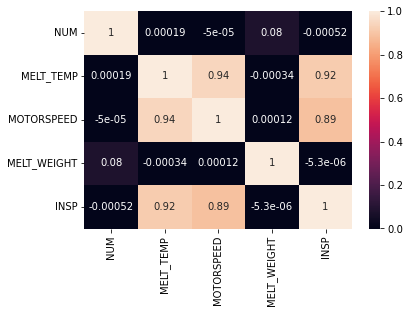

In [41]:
#Relationship analysis
import seaborn as sns
correlation = data.corr()
sns.heatmap(correlation, xticklabels = correlation.columns, 
            yticklabels = correlation.columns, annot = True)

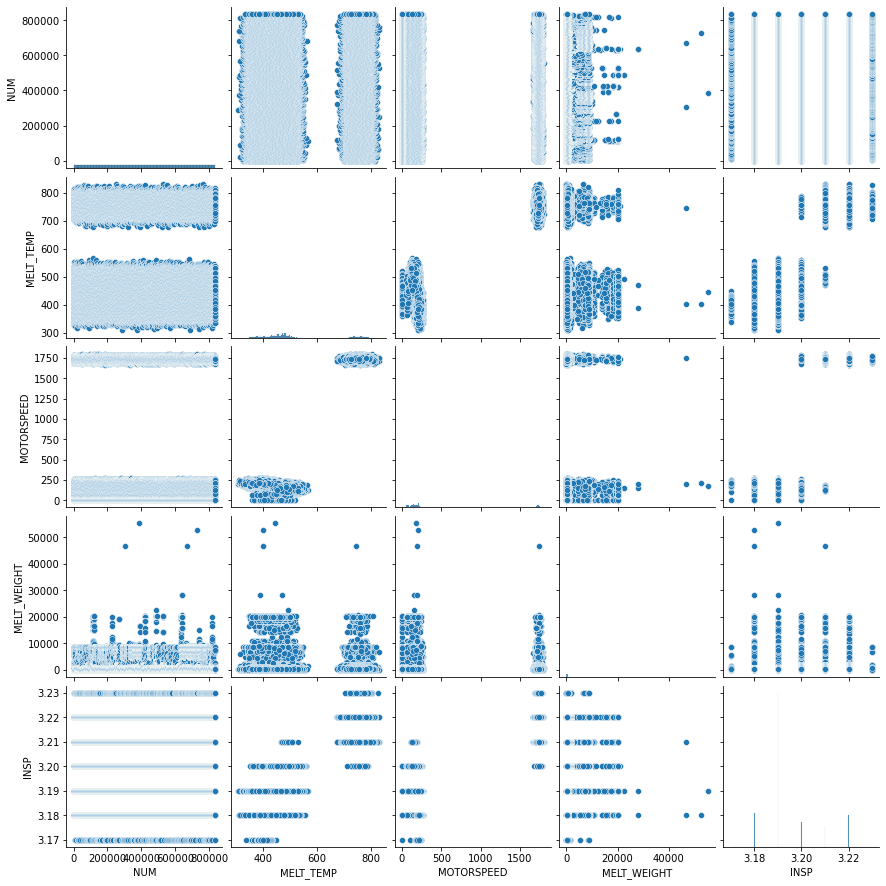

In [42]:
sns.pairplot(data)

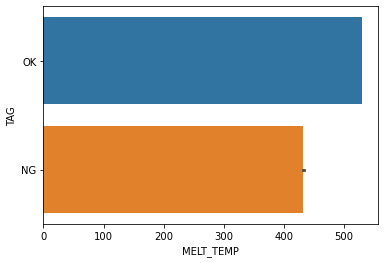

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.barplot(x="MELT_TEMP", y="TAG", data=data)
plt.savefig("MELT_TEMP.jpg")

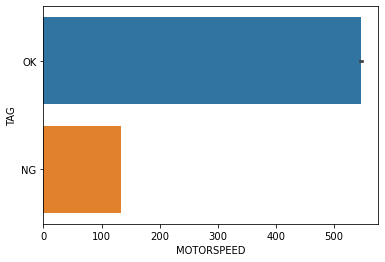

In [11]:
sns.barplot(x="MOTORSPEED", y="TAG", data=data)
plt.savefig("MOTORSPEED.jpg")

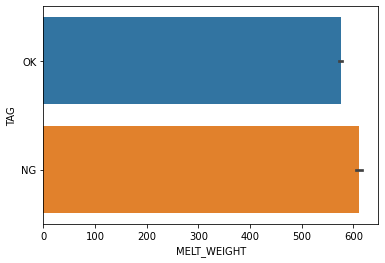

In [12]:
sns.barplot(x="MELT_WEIGHT", y="TAG", data=data)
plt.savefig("MELT_WEIGHT.jpg")

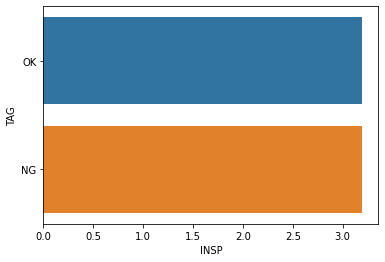

In [13]:
sns.barplot(x="INSP", y="TAG", data=data)
plt.savefig("INSP.jpg")

In [5]:
#Feature Selection (Select the clearly different one)
import seaborn as sns
import matplotlib.pyplot as plt

def plot_box(data, cols, col_x = 'TAG'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(x=col_x, y=col, data=data)
        plt.xlabel(col_x)  # Set text for the x axis
        plt.ylabel(col)    # Set text for y axis
        plt.show()

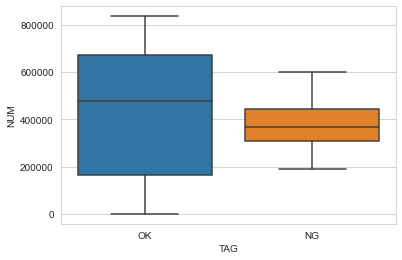

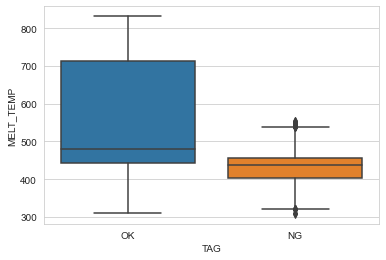

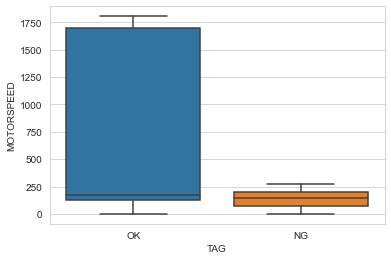

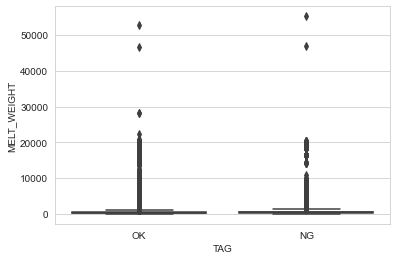

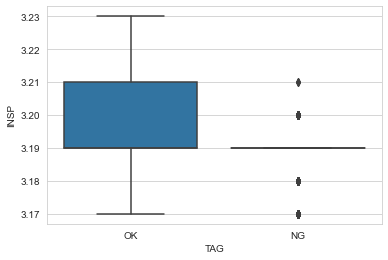

In [15]:
num_cols = ['NUM', 'MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP']
plot_box(data, num_cols)

In [3]:
#Show lower outlier
import numpy as np
def show_lower_outlier(df, stdev=3, show_total=False): 
    # lower bound outliers 
    cols = df.columns 
    print(df.shape) 
    for col in cols: 
        #std
        mean = df[col].mean()  
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75) 
        IQR = Q3 - Q1 
        outlier_step = 1.5 * IQR
        threshold = Q1 - outlier_step 
        n_outlier = np.sum(df[col] < threshold) 
        print(col + ". mean : "+str(round(mean,3))+", num of lower outlier : "+str(n_outlier))
        if (show_total == True) & (n_outlier != 0): 
            print(df.loc[(df[col] < threshold),col][:5])
        print(" -> count of zero : " + str(np.sum(df[col] == 0))+"\n")
        print("")
              
df = data.drop(['STD_DT', 'NUM', 'TAG'], axis=1)            
show_lower_outlier(df, show_total=True)

(835200, 4)
MELT_TEMP. mean : 509.201, num of lower outlier : 19
23276     317
83526     320
90096     315
286233    308
345066    321
Name: MELT_TEMP, dtype: int64
 -> count of zero : 0


MOTORSPEED. mean : 459.783, num of lower outlier : 0
 -> count of zero : 30796


MELT_WEIGHT. mean : 582.962, num of lower outlier : 0
 -> count of zero : 1421


INSP. mean : 3.195, num of lower outlier : 189
6856     3.17
10036    3.17
15376    3.17
23796    3.17
24063    3.17
Name: INSP, dtype: float64
 -> count of zero : 0




In [4]:
#Show upper outlier
cols = df.columns 
print(df.shape) 
for col in cols: 
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75) 
    IQR = Q3 - Q1 
    outlier_step = 1.5 * IQR

    std = df[col].std() 
    threshold = Q3 + outlier_step 
    n_outlier = np.sum(df[col] > threshold) 
    print(col + ". num of upper outlier : "+str(n_outlier))
    if n_outlier != 0: 
        print(df.loc[(df[col] > threshold),col][:5])
        print("\n")

(835200, 4)
MELT_TEMP. num of upper outlier : 167040
4     798
5     743
14    740
15    772
24    740
Name: MELT_TEMP, dtype: int64


MOTORSPEED. num of upper outlier : 167040
4     1736
5     1722
14    1740
15    1729
24    1748
Name: MOTORSPEED, dtype: int64


MELT_WEIGHT. num of upper outlier : 45630
1546    6656
1553    6633
1557    6622
1635    8535
2054    8421
Name: MELT_WEIGHT, dtype: int64


INSP. num of upper outlier : 101390
14    3.22
15    3.22
24    3.22
25    3.22
35    3.22
Name: INSP, dtype: float64




In [50]:
#Check TAG data
data['INSP'].value_counts()

3.19    482383
3.18    107858
3.22    101019
3.20     77772
3.21     65608
3.23       371
3.17       189
Name: INSP, dtype: int64

In [51]:
#Remove lower outlier
cols = ['MELT_TEMP']

print("before drop lower outlier : {}".format(data.shape)) 
for col in cols: 
    Q1 = np.percentile(data[col], 25)
    Q3 = np.percentile(data[col], 75) 
    IQR = Q3 - Q1 
    outlier_step = 1.5 * IQR
    threshold = Q1 - outlier_step 
    n_outlier = np.sum(data[col] > threshold) 
    data.drop(data[df[col] < threshold].index[:], inplace=True)

data.dropna() 
print("after drop lower outlier : {}".format(data.shape))

before drop lower outlier : (835200, 7)
after drop lower outlier : (835181, 7)


In [5]:
#Remove upper outlier
cols = ['MELT_WEIGHT']

print("before drop upper outlier : {}".format(data.shape)) 
for col in cols: 
    Q1 = np.percentile(data[col], 25)
    Q3 = np.percentile(data[col], 75) 
    IQR = Q3 - Q1 
    outlier_step = 1.5 * IQR
    threshold = Q3 + outlier_step 
    n_outlier = np.sum(data[col] > threshold) 
    data.drop(data[data[col] > threshold].index[:], inplace=True)

data.dropna() 
print("after drop upper outlier : {}".format(data.shape))

before drop upper outlier : (835200, 7)
after drop upper outlier : (789570, 7)


In [6]:
data['TAG'].value_counts()

OK    622328
NG    167242
Name: TAG, dtype: int64

In [7]:
#Select X, Y

X = data[['MELT_TEMP','MOTORSPEED','MELT_WEIGHT','INSP']]
y = data[['TAG']]

In [8]:
X

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP
0,489,116,631,3.19
1,433,78,609,3.19
2,464,154,608,3.19
3,379,212,606,3.19
4,798,1736,604,3.21
...,...,...,...,...
835195,755,1743,318,3.21
835196,385,206,317,3.19
835197,465,148,316,3.20
835198,467,0,314,3.19


In [9]:
#Transform y data to numericals label

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
y=le.fit_transform(y)

C:\Users\TEEM\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
print(y)

[1 1 1 ... 1 1 1]


In [11]:
print(X.shape)
print(y.shape)

(789570, 4)
(789570,)


In [12]:
#Scale data

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_transform = scale.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold 
from sklearn.preprocessing import MinMaxScaler 
from imblearn.over_sampling import SMOTE 
from imblearn.pipeline import Pipeline as imbpipeline 
from sklearn.pipeline import Pipeline 

In [14]:
#Prepare training 70% and validation 20% testing data 10%

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.1, random_state=42, shuffle=True, stratify=y)

In [15]:
X_train

array([[-0.21990617, -0.46100476, -1.33701835, -0.41040113],
       [ 2.16556429,  1.9567881 , -1.42513016,  1.28119478],
       [-1.09301954, -0.40783208,  0.92745533, -1.25619908],
       ...,
       [-0.18872355, -0.44223793,  2.29759407, -1.25619908],
       [-1.00726734, -0.38437355,  0.47367947, -0.41040113],
       [-0.19651921, -0.55327499, -0.13869765, -0.41040113]])

In [16]:
print(X_train.shape)
print(y_train.shape)

(710613, 4)
(710613,)


In [17]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

In [18]:
X_train, X_val, y_train, y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=42,shuffle=True,stratify=y_train) 

## SMOTE 기법을 이용하여  Oversampling 하기

In [19]:
from imblearn.over_sampling import SMOTE 
smote=SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

## ADASYN 기법을 이용하여 Oversampling 하기

In [20]:
from imblearn.over_sampling import ADASYN 
adasyn=ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

## Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier 

In [22]:
#Pure
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
from sklearn.metrics import *

In [24]:
predictions=model.predict(X_train)
print('Training accuracy: ', accuracy_score(y_train,predictions))

Training accuracy:  0.9941212686238984


In [25]:
predictions=model.predict(X_val)
print('Validation accuracy: ', accuracy_score(y_val, predictions))

Validation accuracy:  0.7256038783307417


In [26]:
#Evaluate
from sklearn.metrics import classification_report
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.36      0.38      0.37     30104
           1       0.83      0.82      0.82    112019

    accuracy                           0.73    142123
   macro avg       0.60      0.60      0.60    142123
weighted avg       0.73      0.73      0.73    142123



In [27]:
#SMOTE
model=DecisionTreeClassifier()
model.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier()

In [28]:
predictions=model.predict(X_train_smote)
print('Training accuracy: ', accuracy_score(y_train_smote,predictions))

Training accuracy:  0.996270721931101


In [29]:
predictions=model.predict(X_val)
print('Validation accuracy: ', accuracy_score(y_val, predictions))

Validation accuracy:  0.7252450342309127


In [30]:
#Evaluate
from sklearn.metrics import classification_report
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.36      0.39      0.38     30104
           1       0.83      0.81      0.82    112019

    accuracy                           0.73    142123
   macro avg       0.60      0.60      0.60    142123
weighted avg       0.73      0.73      0.73    142123



In [74]:
#ADASYN
model=DecisionTreeClassifier()
model.fit(X_train_adasyn,y_train_adasyn)

DecisionTreeClassifier()

In [75]:
predictions=model.predict(X_train_adasyn)
print('Training accuracy: ', accuracy_score(y_train_adasyn,predictions))

Training accuracy:  0.9961109916302745


In [76]:
predictions=model.predict(X_val)
print('Validation accuracy: ', accuracy_score(y_val, predictions))

Validation accuracy:  0.7229453982549958


In [77]:
#Evaluate
from sklearn.metrics import classification_report
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.36      0.39      0.37     30102
           1       0.83      0.81      0.82    112018

    accuracy                           0.72    142120
   macro avg       0.60      0.60      0.60    142120
weighted avg       0.73      0.72      0.73    142120



(-1.0, 4.0)

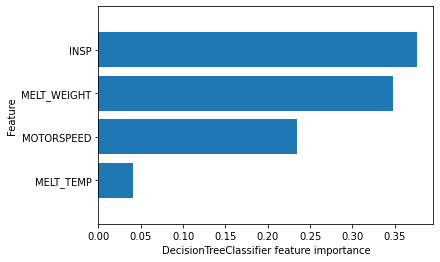

In [19]:
import matplotlib.pyplot as plt 
import numpy as np
n_features=X.shape[1]
plt.barh(np.arange(n_features),sorted(model.feature_importances_),align='center')
plt.yticks(np.arange(n_features),X.columns)
plt.xlabel('DecisionTreeClassifier feature importance')
plt.ylabel('Feature')
plt.ylim(-1,n_features)

## 로지스틱회귀분석

In [31]:
from sklearn.linear_model import LogisticRegression 

In [32]:
#Pure
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [33]:
from sklearn.metrics import *

In [34]:
predictions=model.predict(X_train)
print('Training accuracy: ', accuracy_score(y_train,predictions))

Training accuracy:  0.7829882671638904


In [35]:
predictions=model.predict(X_val)
print('Validation accuracy: ', accuracy_score(y_val, predictions))

Validation accuracy:  0.7827023071564772


In [85]:
#Evaluate

from sklearn.metrics import classification_report
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.41      0.05      0.10     30102
           1       0.79      0.98      0.88    112018

    accuracy                           0.78    142120
   macro avg       0.60      0.52      0.49    142120
weighted avg       0.71      0.78      0.71    142120



In [86]:
#SMOTE
model=LogisticRegression()
model.fit(X_train_smote,y_train_smote)

LogisticRegression()

In [87]:
predictions=model.predict(X_train_smote)
print('Training accuracy: ', accuracy_score(y_train_smote,predictions))

Training accuracy:  0.7160671682263223


In [88]:
predictions=model.predict(X_val)
print('Validation accuracy: ', accuracy_score(y_val, predictions))

Validation accuracy:  0.6733816493104419


In [89]:
#Evaluate

from sklearn.metrics import classification_report
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.37      0.78      0.50     30102
           1       0.92      0.64      0.76    112018

    accuracy                           0.67    142120
   macro avg       0.64      0.71      0.63    142120
weighted avg       0.80      0.67      0.70    142120



In [90]:
#ADASYN
model=LogisticRegression()
model.fit(X_train_adasyn,y_train_adasyn)

LogisticRegression()

In [91]:
predictions=model.predict(X_train_adasyn)
print('Training accuracy: ', accuracy_score(y_train_adasyn,predictions))

Training accuracy:  0.7076134303393912


In [92]:
predictions=model.predict(X_val)
print('Validation accuracy: ', accuracy_score(y_val, predictions))

Validation accuracy:  0.667900365887982


In [93]:
#Evaluate

from sklearn.metrics import classification_report
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.37      0.80      0.51     30102
           1       0.92      0.63      0.75    112018

    accuracy                           0.67    142120
   macro avg       0.65      0.72      0.63    142120
weighted avg       0.81      0.67      0.70    142120



## SVM

In [94]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import time
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Pure
svc_clf = SVC(probability=False, kernel='rbf')
svc_clf.fit(X_train , y_train)

In [ ]:
predictions = svc_clf.predict(X_train)
print('Training accuracy: ', accuracy_score(y_train,predictions))

In [ ]:
predictions = svc_clf.predict(X_val)
print('Validation accuracy: ', accuracy_score(y_val, predictions))

In [ ]:
#Evaluate

from sklearn.metrics import classification_report
print(classification_report(y_val, predictions))

In [ ]:
#SMOTE
svc_clf = SVC(probability=True, kernel='rbf')
svc_clf.fit(X_train_smote , y_train_smote)

In [ ]:
predictions = svc_clf.predict(X_train_smote)
print('Training accuracy: ', accuracy_score(y_train_smote,predictions))

In [36]:
predictions = svc_clf.predict(X_val)
print('Validation accuracy: ', accuracy_score(y_val, predictions))

Validation accuracy:  0.7827469743878412


In [34]:
#Evaluate

from sklearn.metrics import classification_report
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.37      0.78      0.50     30102
           1       0.92      0.64      0.76    112018

    accuracy                           0.67    142120
   macro avg       0.64      0.71      0.63    142120
weighted avg       0.80      0.67      0.70    142120



In [ ]:
#ADASYN
svc_clf = SVC(probability=True, kernel='rbf')
svc_clf.fit(X_train_adasyn , y_train_adasyn)

In [ ]:
predictions = svc_clf.predict(X_train_adasyn)
print('Training accuracy: ', accuracy_score(y_train_adasyn,predictions))

In [36]:
predictions = svc_clf.predict(X_val)
print('Validation accuracy: ', accuracy_score(y_val, predictions))

Validation accuracy:  0.7827469743878412


In [34]:
#Evaluate

from sklearn.metrics import classification_report
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.37      0.78      0.50     30102
           1       0.92      0.64      0.76    112018

    accuracy                           0.67    142120
   macro avg       0.64      0.71      0.63    142120
weighted avg       0.80      0.67      0.70    142120



## XGBoost

In [36]:
from xgboost import plot_importance
from xgboost import XGBClassifier

In [37]:
#Pure
xgb_clf = XGBClassifier(learning_rate = 0.0001, max_depth=4, n_estimators = 25, subsample = '0.9') 
xgb_clf.fit(X_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.0001, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=25, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [38]:
predictions = xgb_clf.predict(X_train)
print('Training accuracy: ', accuracy_score(y_train,predictions))

Training accuracy:  0.7934387588172176


In [39]:
predictions = xgb_clf.predict(X_val)
print('Validation accuracy: ', accuracy_score(y_val, predictions))

Validation accuracy:  0.7930947137338784


In [40]:
#Evaluate

from sklearn.metrics import classification_report
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.79      0.03      0.06     30104
           1       0.79      1.00      0.88    112019

    accuracy                           0.79    142123
   macro avg       0.79      0.51      0.47    142123
weighted avg       0.79      0.79      0.71    142123



In [41]:
#SMOTE
xgb_clf = XGBClassifier(learning_rate = 0.0001, max_depth=4, n_estimators = 25, subsample = '0.9') 
xgb_clf.fit(X_train_smote , y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.0001, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=25, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [42]:
predictions = xgb_clf.predict(X_train_smote)
print('Training accuracy: ', accuracy_score(y_train_smote,predictions))

Training accuracy:  0.7458489184870424


In [43]:
predictions = xgb_clf.predict(X_val)
print('Validation accuracy: ', accuracy_score(y_val, predictions))

Validation accuracy:  0.667140434693892


In [103]:
#Evaluate

from sklearn.metrics import classification_report
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.38      0.87      0.53     30102
           1       0.95      0.61      0.74    112018

    accuracy                           0.67    142120
   macro avg       0.66      0.74      0.63    142120
weighted avg       0.83      0.67      0.70    142120



In [104]:
#ADASYN
xgb_clf = XGBClassifier(learning_rate = 0.0001, max_depth=4, n_estimators = 25, subsample = '0.9') 
xgb_clf.fit(X_train_adasyn , y_train_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.0001, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=25, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [105]:
predictions = xgb_clf.predict(X_train_adasyn)
print('Training accuracy: ', accuracy_score(y_train_adasyn,predictions))

Training accuracy:  0.732909814007339


In [106]:
predictions = xgb_clf.predict(X_val)
print('Validation accuracy: ', accuracy_score(y_val, predictions))

Validation accuracy:  0.6635237827188292


In [107]:
#Evaluate

from sklearn.metrics import classification_report
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.37      0.88      0.52     30102
           1       0.95      0.61      0.74    112018

    accuracy                           0.66    142120
   macro avg       0.66      0.74      0.63    142120
weighted avg       0.83      0.66      0.69    142120



## Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
#Pure
rf_clf = RandomForestClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=4) #객체 생성
rf_clf.fit(X_train , y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=4)

In [46]:
predictions = rf_clf.predict(X_train)
print('Training accuracy: ', accuracy_score(y_train,predictions))

Training accuracy:  0.7936603985997994


In [47]:
predictions = rf_clf.predict(X_val)
print('Validation accuracy: ', accuracy_score(y_val, predictions))

Validation accuracy:  0.7932072922750012


In [48]:
#Evaluate

from sklearn.metrics import classification_report
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.79      0.03      0.06     30104
           1       0.79      1.00      0.88    112019

    accuracy                           0.79    142123
   macro avg       0.79      0.52      0.47    142123
weighted avg       0.79      0.79      0.71    142123



In [113]:
#SMOTE
rf_clf = RandomForestClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=4) #객체 생성
rf_clf.fit(X_train_smote , y_train_smote)

RandomForestClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=4)

In [114]:
predictions = rf_clf.predict(X_train_smote)
print('Training accuracy: ', accuracy_score(y_train_smote,predictions))

Training accuracy:  0.7540791708419908


In [115]:
predictions = rf_clf.predict(X_val)
print('Validation accuracy: ', accuracy_score(y_val, predictions))

Validation accuracy:  0.6805797917253026


In [116]:
#Evaluate

from sklearn.metrics import classification_report
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.39      0.86      0.53     30102
           1       0.94      0.63      0.76    112018

    accuracy                           0.68    142120
   macro avg       0.66      0.75      0.65    142120
weighted avg       0.83      0.68      0.71    142120



In [117]:
#ADASYN
rf_clf = RandomForestClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=4) #객체 생성
rf_clf.fit(X_train_adasyn , y_train_adasyn)

RandomForestClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=4)

In [118]:
predictions = rf_clf.predict(X_train_adasyn)
print('Training accuracy: ', accuracy_score(y_train_adasyn,predictions))

Training accuracy:  0.7394687547707213


In [119]:
predictions = rf_clf.predict(X_val)
print('Validation accuracy: ', accuracy_score(y_val, predictions))

Validation accuracy:  0.670785251899803


In [120]:
#Evaluate

from sklearn.metrics import classification_report
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.38      0.87      0.53     30102
           1       0.95      0.62      0.75    112018

    accuracy                           0.67    142120
   macro avg       0.66      0.74      0.64    142120
weighted avg       0.83      0.67      0.70    142120

